In [160]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data reading

In [161]:
df = pd.read_csv("training.csv")
df.tail()

,Order parameter,KS,Lya_max,Shibata,delta
3502,0.04,0.440796,0.746871,0.44585365056991577,-0.034167
3503,0.09,0.453379,0.670626,0.56694704294204712,0.060557
3504,0.05,0.455503,0.652245,0.44529658555984497,-0.014369
3505,0.09,0.436196,0.635463,0.35964575409889221,0.008380
3506,0.05,0.424425,0.666059,0.52332842350006104,-0.042542


In [162]:
#df.drop('Lya_max', axis=1, inplace=True)

In [163]:
df.head()

,Order parameter,KS,Lya_max,Shibata,delta
0,0.97,0.021836,2.802597e-45,-0.12269295006990433,0.0
1,0.97,0.021868,4.818850e-04,-0.11434340476989746,0.0
2,0.97,0.021837,-3.125273e-03,-0.13559214770793915,0.0
3,0.97,0.021928,-4.281330e-03,-0.14422507584095001,0.0
4,0.97,0.021839,-4.273063e-03,-0.14577232301235199,0.0


In [164]:
df['Shibata']=df['Shibata'].replace([ '-Infinity'], -1000)


In [165]:
df['Shibata'].head()


0    -0.12269295006990433
1    -0.11434340476989746
2    -0.13559214770793915
3    -0.14422507584095001
4    -0.14577232301235199
Name: Shibata, dtype: object

## Reading the labels

In [166]:
df.to_csv('out.csv')

In [167]:
len(df)

3507

# Adding the labels for each sample

In [168]:
#0 =>periodic
#1 =>periodic2
#2 => Frozen
#3 => Selection
#4 => Defect
#5 => Intermittence
#6 => chaos
y = []
for i in range(len(df)):
    if (i <=502):
        y.append("periodic")
    if( 503<= i <= 1004):
        y.append("periodic2")
    if( 1004<=i<=1505):
        y.append("Frozen")
    if( 1505<=i<=2005):
        y.append("Selection")
    if( 2006<=i<=2506):
        y.append("Defect")
    if( 2507<=i<=3007):
        y.append("Intermittence")
    if( 3008<=i<=3508):
        y.append("Chaos")
    

In [169]:
df['Pattern']=pd.DataFrame(y)

In [170]:
df.head()

,Order parameter,KS,Lya_max,Shibata,delta,Pattern
0,0.97,0.021836,2.802597e-45,-0.12269295006990433,0.0,periodic
1,0.97,0.021868,4.818850e-04,-0.11434340476989746,0.0,periodic
2,0.97,0.021837,-3.125273e-03,-0.13559214770793915,0.0,periodic
3,0.97,0.021928,-4.281330e-03,-0.14422507584095001,0.0,periodic
4,0.97,0.021839,-4.273063e-03,-0.14577232301235199,0.0,periodic


In [171]:
d = {'periodic':0,'periodic2':1,'Frozen':2,'Selection':3,'Defect':4,'Intermittence':5,'Chaos':6}

In [172]:
df['Pattern'] = df['Pattern'].map(d)

In [173]:
df.head()

,Order parameter,KS,Lya_max,Shibata,delta,Pattern
0,0.97,0.021836,2.802597e-45,-0.12269295006990433,0.0,0
1,0.97,0.021868,4.818850e-04,-0.11434340476989746,0.0,0
2,0.97,0.021837,-3.125273e-03,-0.13559214770793915,0.0,0
3,0.97,0.021928,-4.281330e-03,-0.14422507584095001,0.0,0
4,0.97,0.021839,-4.273063e-03,-0.14577232301235199,0.0,0


## Saving samples with their labels in a cvs file

In [174]:
df.to_csv('DEF.csv')

In [175]:

df['Shibata'] = df['Shibata'].astype('float64') 

In [176]:
df.head()

,Order parameter,KS,Lya_max,Shibata,delta,Pattern
0,0.97,0.021836,2.802597e-45,-0.122693,0.0,0
1,0.97,0.021868,4.818850e-04,-0.114343,0.0,0
2,0.97,0.021837,-3.125273e-03,-0.135592,0.0,0
3,0.97,0.021928,-4.281330e-03,-0.144225,0.0,0
4,0.97,0.021839,-4.273063e-03,-0.145772,0.0,0


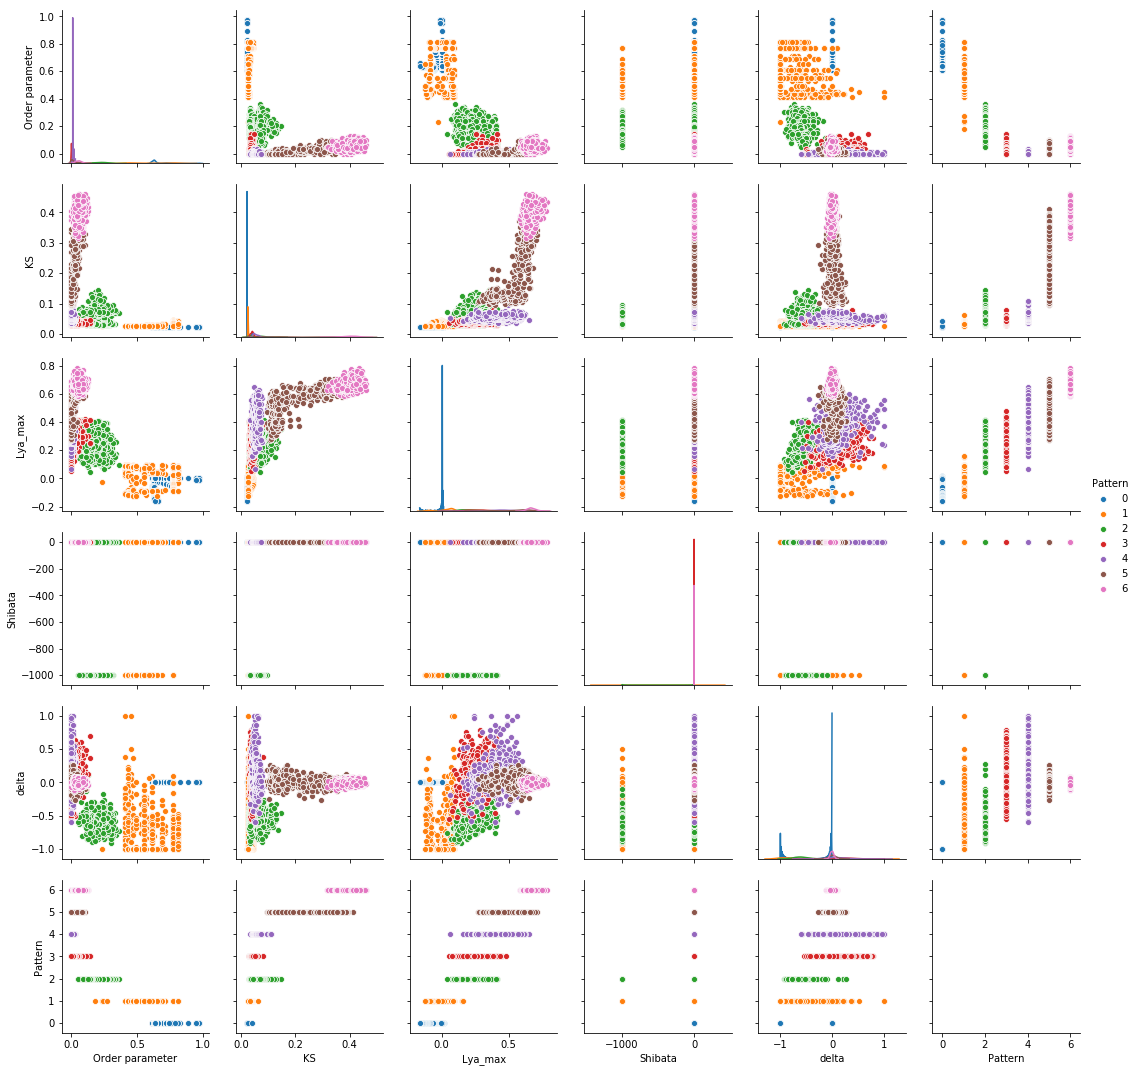

In [177]:
sns.pairplot(df, hue="Pattern")

In [178]:
y = df['Pattern'].values

In [179]:
y

array([0, 0, 0, ..., 6, 6, 6])

In [180]:
X = df.values

In [181]:
X

array([[ 9.70000000e-01,  2.18359604e-02,  2.80259693e-45,
        -1.22692950e-01,  0.00000000e+00,  0.00000000e+00],
       [ 9.70000000e-01,  2.18683202e-02,  4.81885014e-04,
        -1.14343405e-01,  0.00000000e+00,  0.00000000e+00],
       [ 9.70000000e-01,  2.18374245e-02, -3.12527269e-03,
        -1.35592148e-01,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 5.00000000e-02,  4.55503047e-01,  6.52244925e-01,
         4.45296586e-01, -1.43686943e-02,  6.00000000e+00],
       [ 9.00000000e-02,  4.36195791e-01,  6.35462880e-01,
         3.59645754e-01,  8.37952923e-03,  6.00000000e+00],
       [ 5.00000000e-02,  4.24425393e-01,  6.66058779e-01,
         5.23328424e-01, -4.25417498e-02,  6.00000000e+00]])

In [182]:
X = df.iloc[:,0:5].values

In [183]:
X = np.array(X)

In [184]:
X

array([[ 9.70000000e-01,  2.18359604e-02,  2.80259693e-45,
        -1.22692950e-01,  0.00000000e+00],
       [ 9.70000000e-01,  2.18683202e-02,  4.81885014e-04,
        -1.14343405e-01,  0.00000000e+00],
       [ 9.70000000e-01,  2.18374245e-02, -3.12527269e-03,
        -1.35592148e-01,  0.00000000e+00],
       ...,
       [ 5.00000000e-02,  4.55503047e-01,  6.52244925e-01,
         4.45296586e-01, -1.43686943e-02],
       [ 9.00000000e-02,  4.36195791e-01,  6.35462880e-01,
         3.59645754e-01,  8.37952923e-03],
       [ 5.00000000e-02,  4.24425393e-01,  6.66058779e-01,
         5.23328424e-01, -4.25417498e-02]])

In [185]:
from sklearn.model_selection import train_test_split #dividing into training 70% and training 30%
#randomly
from sklearn.metrics import accuracy_score

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True)
    

## Data normalization (average, variable)

In [187]:

mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)

In [188]:
mu,sigma

(array([  0.22253464,   0.11641169,   0.30476599, -73.13204067,
         -0.13738275]),
 array([2.75320540e-01, 1.35578135e-01, 2.47833257e-01, 2.59988525e+02,
        3.68722470e-01]))

In [189]:
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

In [190]:
X_test

array([[-0.48138304,  2.36532468,  1.35466525,  0.28315996,  0.3600976 ],
       [-0.59034694, -0.56514783,  0.25053156,  0.28033896,  0.7282583 ],
       [-0.80827474, -0.53416271,  0.09921211,  0.28077792,  1.13893227],
       ...,
       [-0.66298954,  1.90915164,  1.66395525,  0.28285546,  0.33802162],
       [-0.80827474,  0.08307374,  0.71124826,  0.28174173,  0.79781028],
       [-0.80827474, -0.54643655, -0.21476469,  0.28083941,  0.5970545 ]])

Start of training

In [191]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [192]:
y_pred = knn_model.predict(X_test)

In [193]:
accuracy_score(y_pred,y_test) 

0.9211775878442545

In [194]:
from sklearn.naive_bayes import GaussianNB #usando Gaussian Naive Bayes
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [195]:
accuracy_score(y_pred,y_test)

0.929724596391263

In [196]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_pred,y_test)

0.8148148148148148

In [197]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred,y_test)

0.929724596391263

In [198]:
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=10, random_state=1)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [199]:
y_test_pred = dt_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.929724596391263

In [200]:
from sklearn.ensemble import VotingClassifier#comite de maquinas por votacao
from sklearn import svm

In [201]:
clf1 = KNeighborsClassifier(n_neighbors=2)
clf2 = QuadraticDiscriminantAnalysis()
clf3 = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=1)
clf4 = GaussianNB()
#clf5 = LinearDiscriminantAnalysis()


eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
    voting='hard')

In [202]:
eclf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')), ('rf', QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_co...         min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [203]:
y_test_pred = eclf.predict(X_test)

In [204]:
prob = clf.predict_proba(X_test)
prob.shape

(1053, 7)

In [205]:
prob[1,:]

array([2.30424992e-192, 3.93588796e-019, 4.55772029e-009, 9.99999615e-001,
       4.53034100e-025, 3.80156819e-007, 6.18124003e-057])

In [206]:
y_test_pred[1]

3

In [207]:
accuracy_score(y_test_pred,y_test)

0.9411206077872745

In [208]:
from sklearn.metrics import confusion_matrix

In [209]:
y_test.shape

(1053,)

In [210]:
y.shape

(3507,)

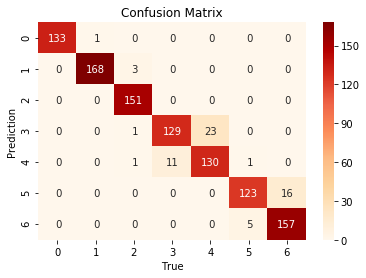

In [211]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Confusion Matrix')
plt.ylabel('Prediction')
plt.xlabel('True')
plt.show()

In [212]:
from sklearn.metrics import f1_score

In [213]:
f1_score(y_test, y_test_pred,average='weighted')

0.9409240885106277

In [214]:
from sklearn.metrics import precision_score

In [215]:
precision_score(y_test, y_test_pred, average='weighted')

0.942243576689981

In [216]:
from sklearn.metrics import recall_score

In [217]:
recall_score(y_test, y_test_pred, average='weighted')

0.9411206077872745

In [219]:
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 

In [220]:
resultado = cross_val_score(eclf, X_train, y_train, scoring='accuracy')


In [221]:
print('O score cross-validado do VotingClassifier eh:', resultado.mean())

('O score cross-validado do VotingClassifier eh:', 0.9482605040346391)


## Applying in the unknown sample

In [222]:
amostra = pd.read_csv("sample2.csv")
amostra.head()

,Parametro de ordem,Ks,Lya_max,Shibata,Delta
0,0.30,0.000000,0.000000,-Infinity,1.0
1,0.30,0.000000,-0.276235,-Infinity,1.0
2,0.17,0.000000,-0.114283,-Infinity,1.0
3,0.19,0.000000,-0.029700,-Infinity,1.0
4,0.32,0.000302,0.030233,-Infinity,1.0


In [223]:
amostra['Shibata']=amostra['Shibata'].replace([ '-Infinity'], -10)
amostra['Shibata']=amostra['Shibata'].replace([ 'Infinity'], 10)
amostra.head()

,Parametro de ordem,Ks,Lya_max,Shibata,Delta
0,0.30,0.000000,0.000000,-10,1.0
1,0.30,0.000000,-0.276235,-10,1.0
2,0.17,0.000000,-0.114283,-10,1.0
3,0.19,0.000000,-0.029700,-10,1.0
4,0.32,0.000302,0.030233,-10,1.0


In [224]:
amostra.tail()

,Parametro de ordem,Ks,Lya_max,Shibata,Delta
250494,0.13,0.131506,0.522692,-0.12728217244148254,0.033050
250495,0.05,0.130454,0.515329,-0.24937945604324341,-0.118324
250496,0.11,0.137091,0.515468,-0.21375995874404907,-0.172342
250497,0.05,0.149136,0.465574,-0.27306929230690002,0.050843
250498,0.05,0.123176,0.464117,-0.17050124704837799,-0.018771


In [225]:
#amostra.to_csv('out.csv')
amostra.isnull().sum()

Parametro de ordem    499
Ks                    499
Lya_max               499
Shibata               499
Delta                 499
dtype: int64

In [226]:
amostra.loc[amostra['Shibata'].isnull()]

,Parametro de ordem,Ks,Lya_max,Shibata,Delta
500,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN
1502,NaN,NaN,NaN,NaN,NaN
2003,NaN,NaN,NaN,NaN,NaN
2504,NaN,NaN,NaN,NaN,NaN
3005,NaN,NaN,NaN,NaN,NaN
3506,NaN,NaN,NaN,NaN,NaN
4007,NaN,NaN,NaN,NaN,NaN
4508,NaN,NaN,NaN,NaN,NaN
5009,NaN,NaN,NaN,NaN,NaN


In [227]:
amostra=amostra.dropna(axis=0, how='any')   

In [228]:
amostra.loc[amostra['Shibata'].isnull()]

,Parametro de ordem,Ks,Lya_max,Shibata,Delta


In [229]:

X1= amostra.iloc[:,0:5].values

# 

In [230]:
X1 = np.array(X1,dtype=np.float)

In [231]:
X1[1,:]


array([  0.3       ,   0.        ,  -0.27623454, -10.        ,
         1.        ])

In [232]:
X1

array([[  0.3       ,   0.        ,   0.        , -10.        ,
          1.        ],
       [  0.3       ,   0.        ,  -0.27623454, -10.        ,
          1.        ],
       [  0.17      ,   0.        ,  -0.11428257, -10.        ,
          1.        ],
       ...,
       [  0.11      ,   0.13709113,   0.51546782,  -0.21375996,
         -0.17234185],
       [  0.05      ,   0.14913557,   0.4655737 ,  -0.27306929,
          0.050843  ],
       [  0.05      ,   0.12317573,   0.46411672,  -0.17050125,
         -0.01877104]])

In [233]:
sigma

array([2.75320540e-01, 1.35578135e-01, 2.47833257e-01, 2.59988525e+02,
       3.68722470e-01])

In [234]:
len(X1)

250000

In [235]:
X1 = (X1 - mu)/sigma

In [236]:
Y = []
for i in range(250000):
    b =X1[i,:].reshape(1, -1)
    a= eclf.predict(b)
    Y.append(a)

In [237]:
Y

[array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([3]),
 array([2]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([2]),
 array([1]),
 array([2]),
 array([2]),
 array([2]),
 array([0]),
 array([0]),
 array([2]),
 array([0]),
 array([2]),
 array([2]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([2]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([2]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),

In [259]:
len(Y)

250000

In [260]:
Y = np.array(Y)

In [261]:
len(Y)

250000

In [262]:
np.savetxt('y_new_norm.dat', Y)

In [263]:
PROBABILIDADE = clf.predict_proba(X1)[:,1]
PROBABILIDADE.shape

(250000,)

In [265]:
prob_amostra = clf.predict_proba(X1) #calculating prediction probability

In [266]:
prob_amostra

array([[0.00000000e+000, 1.00000000e+000, 1.80360012e-033, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 1.26240782e-046, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 3.62719891e-036, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       ...,
       [0.00000000e+000, 1.47886922e-175, 9.99991273e-001, ...,
        3.15264453e-104, 8.72671503e-006, 9.67188077e-025],
       [0.00000000e+000, 5.79101340e-218, 4.69425610e-006, ...,
        2.34108273e-040, 9.99995306e-001, 6.64859276e-025],
       [0.00000000e+000, 2.28972679e-145, 8.00312090e-006, ...,
        6.37232478e-028, 9.99991997e-001, 4.86042221e-026]])

In [267]:
Y[24010]

array([2])

In [268]:
prob1 = []
for i in range(prob_amostra.shape[0]):
    a = np.max(prob_amostra[i,:])
    prob1.append(a)

In [269]:
prob1 = np.array(prob1)
prob1[0]

1.0

In [270]:
prob2 = []
for i in range(250000):
    if(prob1[i]<0.52):
        a = prob1[i]
        prob2.append(a)


In [271]:
prob2 = np.array(prob2)
prob2.shape

(1132,)

In [275]:
Y_VETOR = Y.reshape(-1)
Y_VETOR.shape

(250000,)

In [276]:
prob1 = np.array(prob1)
prob1.shape

(250000,)

In [277]:
a = np.hstack([prob1,Y_VETOR.T])

In [278]:
a

array([1., 1., 1., ..., 5., 5., 5.])

In [280]:
1132/250000.0

0.004528